A series of tests of the SLIP package.

In [63]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 12
figsize=(fig_width, .618*fig_width)
fopts = {'fontsize':18}
opts= {'cmap': plt.cm.gray, 'vmin':-1., 'vmax':1., 'interpolation':'nearest', 'origin':'upper'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
from SLIP import Image, imread

## initializing the SLIP object

The SLIP object may be initialized by giving some parameters. These could be given using 

In [65]:
print(Image.__init__.__doc__)


        Initializes the Image class

        May take as input:

        - a dictionary containing parameters 
        - a ``ndarray`` (dimensions ``N_X`` and ``N_Y`` are guessed from this array)
        - a string representing a file or URL pointing to an image file
        - a string pointing to  a file or URL containing a dictionary of parameters 
        - a ``NeuroTools.parameters.ParameterSet`` object containing parameters 

        Parameters are 

        - N_X and N_Y which are respectively the number of pixels in the vertical and horizontal dimensions respectively (MANDATORY)
        - optional parameters which are used in the various functions such as N_image when handling a database or the whitening parameters.

        


- nothing

In [66]:
im = Image()  # default is {'N_X':128, 'N_Y':128}
print(im.pe)

{'N_Y': 128, 'verbose': 30, 'N_X': 128}


- a dictionary (dimensions ``N_X`` and ``N_Y`` are mandatory)

In [67]:
im = Image({'N_X':32, 'N_Y':64})
print(im.pe)

{'N_Y': 64, 'verbose': 30, 'N_X': 32}


- a ``ndarray`` (dimensions ``N_X`` and ``N_Y`` are guessed from this array)

In [68]:
im = Image({'N_X':32, 'N_Y':64})
print(im.pe)

{'N_Y': 64, 'verbose': 30, 'N_X': 32}


- a string indicating the path of a image file

In [69]:
im = Image('database/lena64.png')
print(im.pe)

{'N_Y': 64, 'verbose': 30, 'N_X': 64}


- a string indicating the URL to a image file

In [70]:
im = Image('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
print(im.pe)

{'N_Y': 1058, 'verbose': 30, 'N_X': 1058}


- a string indicating the path of a file containing a dictionary

In [71]:
im = Image('file://default_param.py')
im = Image('default_param.py')
print(im.pe.keys())

dict_keys(['ext', 'verbose', 'do_mask', 'white_alpha', 'datapath', 'N_image', 'white_name_database', 'N_X', 'figpath', 'white_N_0', 'N_Y', 'white_steepness', 'white_n_learning', 'matpath', 'white_N', 'white_f_0', 'seed', 'white_recompute'])


- a string indicating the URL of a file containing a dictionary

In [72]:
im = Image('https://raw.githubusercontent.com/meduz/SLIP/master/default_param.py')
print(im.pe.keys())

dict_keys(['ext', 'verbose', 'do_mask', 'white_alpha', 'datapath', 'N_image', 'white_name_database', 'N_X', 'figpath', 'white_N_0', 'N_Y', 'white_steepness', 'white_n_learning', 'matpath', 'white_N', 'white_f_0', 'seed', 'white_recompute'])


- a NeuroTools object

In [73]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
im = Image(ParameterSet({'N_X':128, 'N_Y':128}))

The parameters may be handled using the properties of the ``ParameterSet`` object.

## resizing the SLIP object

The SLIP object may be adapted to a new size

- nothing

In [74]:
print(im.set_size.__doc__)


        Re-initializes the Image class with  the size given in ``im``

        May take as input:

        - a numpy array,
        - a string representing a file or URL pointing to an image file
        - a tuple

        Updated parameters are 

        - N_X and N_Y which are respectively the number of pixels in the vertical and horizontal dimensions respectively (MANDATORY)

        


In [75]:
im = Image()  # default is {'N_X':128, 'N_Y':128}
print(im.pe)

{'N_Y': 128, 'verbose': 30, 'N_X': 128}


In [76]:
im.set_size((512, 234))
print(im.pe)

{'N_Y': 234, 'verbose': 30, 'N_X': 512}


In [77]:
im.set_size(np.ones((512, 234)))
print(im.pe)

{'N_Y': 234, 'verbose': 30, 'N_X': 512}


In [78]:
im.set_size('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
print(im.pe)

{'N_Y': 1058, 'verbose': 30, 'N_X': 1058}


## testing logging

we use https://docs.python.org/3.4/library/logging.html to handle logging of events

In [79]:
im = Image()
print('Verbosity level=', im.pe.verbose)

Verbosity level= 30


In [80]:
im.log.debug(' > this should not appear')
im.log.info(' > this should not appear')
im.log.error(' > this *should* appear')

ERROR:SLIP: > this *should* appear


In [81]:
im.pe.verbose = 15
im.init_logging()
im.log.debug(' > this should not appear')
im.log.info(' > this *should* appear')
im.log.error(' > this *should* appear')

INFO:SLIP: > this *should* appear
ERROR:SLIP: > this *should* appear


## basic parameter check

TODO

In [82]:
try:
    Image({'N_X':128, 'N_Y':-12})
except Exception as e:
    print(e) 

negative dimensions are not allowed


## testing reading an image file

In [83]:
image = imread('database/lena64.png')
im = Image(image)
print(im.pe)

{'N_Y': 64, 'verbose': 30, 'N_X': 64}


In [84]:
im.set_size('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
print(im.pe)

{'N_Y': 1058, 'verbose': 30, 'N_X': 1058}


## testing import and cropping

Using image  F_N77002.jpg
Cropping @ [left, right, bottom, top]:  [128, 256, 28, 156]
Using image  M_N160002.jpg
Cropping @ [left, right, bottom, top]:  [114, 242, 27, 155]
Using image  B_N77079.jpg
Cropping @ [left, right, bottom, top]:  [15, 143, 87, 215]
Using image  B_N109005.jpg
Cropping @ [left, right, bottom, top]:  [19, 147, 109, 237]
Using image  Hdn_land840.jpg
Cropping @ [left, right, bottom, top]:  [111, 239, 94, 222]
Using image  Fda_art464.jpg
Cropping @ [left, right, bottom, top]:  [63, 191, 7, 135]
Using image  Mda_urb214.jpg
Cropping @ [left, right, bottom, top]:  [61, 189, 88, 216]
Using image  Mda_par104.jpg
Cropping @ [left, right, bottom, top]:  [3, 131, 128, 256]


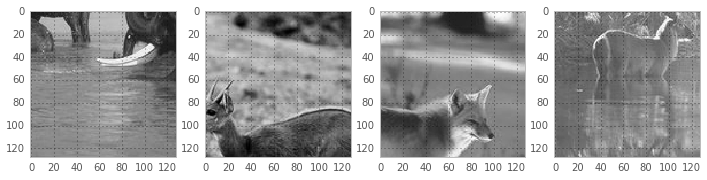

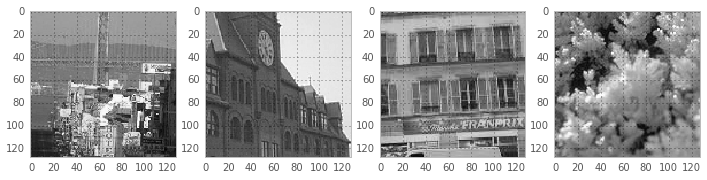

In [85]:
axs = []
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False})
im.pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
for name_database in ['serre07_targets', 'serre07_distractors']:
    fig = plt.figure(figsize=figsize)
    for _ in range(4):
        image, filename, croparea = im.patch(name_database, )
        axs.append(fig.add_subplot(1, 4, _))
        axs[-1].imshow(im.normalize(image, center=True, use_max=True), **opts)
    fig.show()

## Handling a database

In [86]:
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False, 'N_image':10})
im.pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
print(im.make_imagelist.__doc__)
# extract one image list from a database
imagelist = im.make_imagelist('serre07_targets')
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])


        Makes a list of images with no repetition.

        Takes as an input the name of a database (the name of a folder in the `datapath``),
        returns a list of the filenames along with the crop area.

        
Number of images: 10
First image: ['H_N136011.jpg', [119, 247, 59, 187]]


In [87]:
print(im.get_imagelist.__doc__)
im.pe.figpath, im.pe.matpath = '/tmp/fig', '/tmp/mat'
# store one image list from a database
imagelist = im.get_imagelist('classifier', 'serre07_targets')
!ls -l /tmp/mat
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])


        returns an imagelist from a pickled database.

        If the stored imagelist does not exist, creates it.
        The ``exp`` sting allows to tag the list to a particular experiment.

        
total 4
-rw-r--r-- 1 lolo wheel 385 May 21 12:19 classifier_serre07_targets_images.pickle
Number of images: 10
First image: ['F_N16064.jpg', [72, 200, 58, 186]]


In [88]:
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False, 'N_image':10})
im.pe.figpath, im.pe.matpath = '/tmp/fig', '/tmp/mat'
# now we can access again this stored list
!ls -l /tmp/mat
imagelist = im.get_imagelist('classifier', 'serre07_targets')
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])

total 4
-rw-r--r-- 1 lolo wheel 385 May 21 12:19 classifier_serre07_targets_images.pickle
Number of images: 10
First image: ['F_N16064.jpg', [72, 200, 58, 186]]


## checking basic translation mechanism

defining a reference test image; check the axis labels for a (x,y) translation

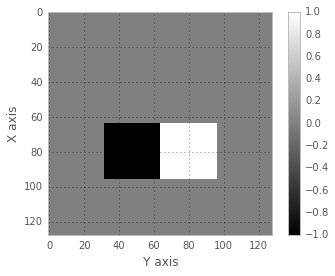

In [89]:
im = Image({'N_X':128, 'N_Y':128})
image = np.zeros((im.N_X, im.N_Y))
image[im.N_X/2:im.N_X/2+im.N_X/4, im.N_X/2:im.N_X/2+im.N_X/4] = 1 # white square on the right
image[im.N_X/2:im.N_X/2+im.N_X/4, im.N_X/4:im.N_X/2] = -1  # black square on the left
plt.imshow(image, **opts)
plt.ylabel('X axis')
plt.xlabel('Y axis')
plt.colorbar()

translating the image by an integer by rolling indices


16.0 32.0


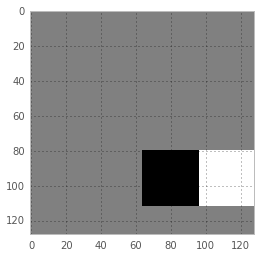

In [90]:
print(im.N_X/8., im.N_Y/4.)
plt.imshow(np.roll(np.roll(image, np.int(im.N_X/8.), axis=0), np.int(im.N_X/4.), axis=1), **opts)

(remember axis of imshow shox x going down, y going right)

translating the image down

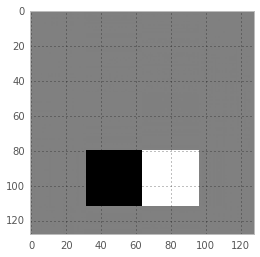

In [91]:
plt.imshow(im.translate(image, [im.N_X/8., 0.]), **opts)

translating the image right

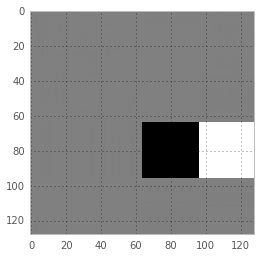

In [92]:
plt.imshow(im.translate(image, [0., im.N_Y/4.]), **opts)

translating the image on both axis

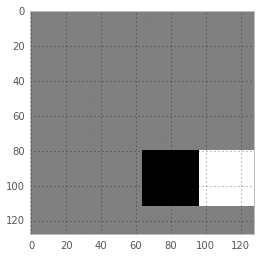

In [93]:
plt.imshow(im.translate(image, [im.N_X/8., im.N_Y/4.]), **opts)

translating the image over the torus

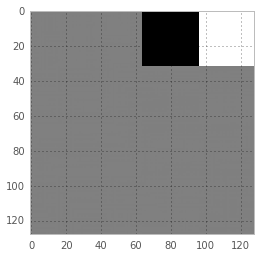

In [94]:
plt.imshow(im.translate(image, [im.N_X/2., im.N_Y/4.]), **opts)

[Back to top](#SLIP)

## some checks that should produce gray images (= null error)

null translation gives the same image

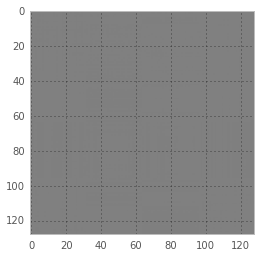

In [95]:
plt.imshow(image - im.translate(image, [0., 0.]), **opts)

the lg.translate function is invertible

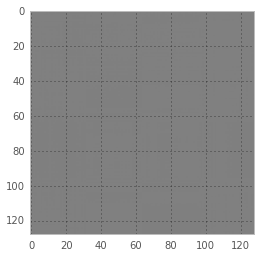

In [96]:
plt.imshow(image - im.translate(im.translate(image, [1.64, -2.233]), [-1.64, 2.233]), **opts)
#plt.colorbar()

also true for bigger translations  (we separate integer part from fractional part in the translation)

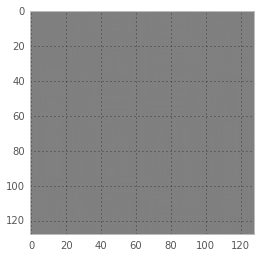

In [97]:
plt.imshow(image - im.translate(im.translate(image, [182.64, -286.233]), [-182.64, 286.233], preshift=True), **opts)

but not always true when we don't separate

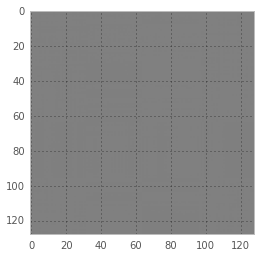

In [98]:
plt.imshow(image - im.translate(im.translate(image, [182.64, -286.233]), [-182.64, 286.233], preshift=False), **opts)

the lg.translate function is periodic

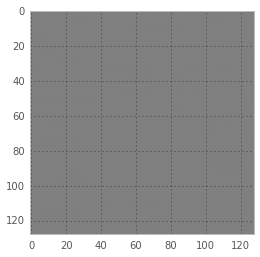

In [99]:
plt.imshow(image - im.translate(image, [-45*im.N_X, 5*im.N_Y]), **opts)

lg.translate function is associative

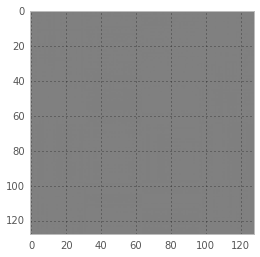

In [100]:
plt.imshow(im.translate(image, [1., .0]) - im.translate(im.translate(image, [.5, .0]), [.5, .0]), **opts)

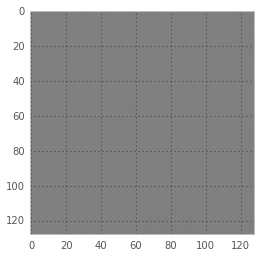

In [101]:
plt.imshow(im.translate(image, [2., .0]) - im.translate(im.translate(image, [1.5, -1.0]), [.5, 1.0]), **opts)

## filtering

TODO

## whitening

TODO

Using image  M_N802029.jpg


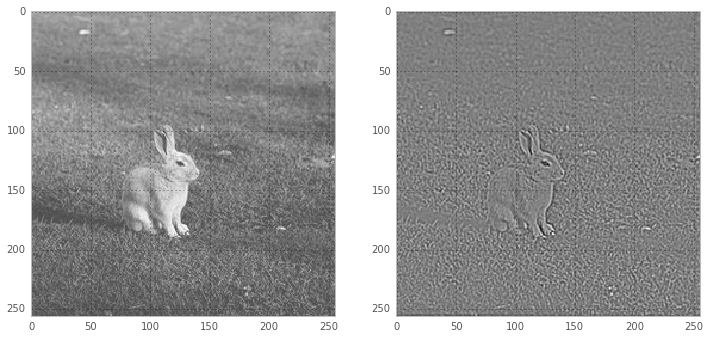

Using image  H_N108003.jpg


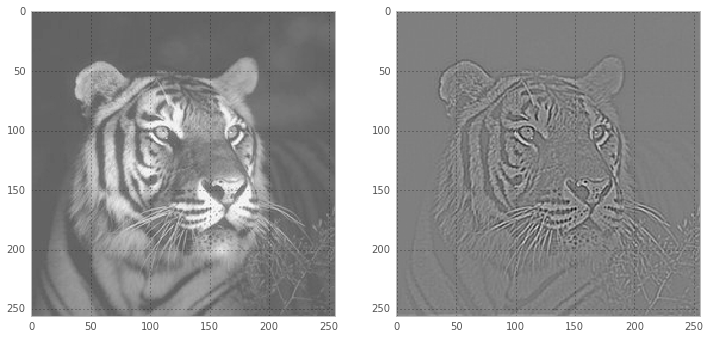

Using image  H_N108024.jpg


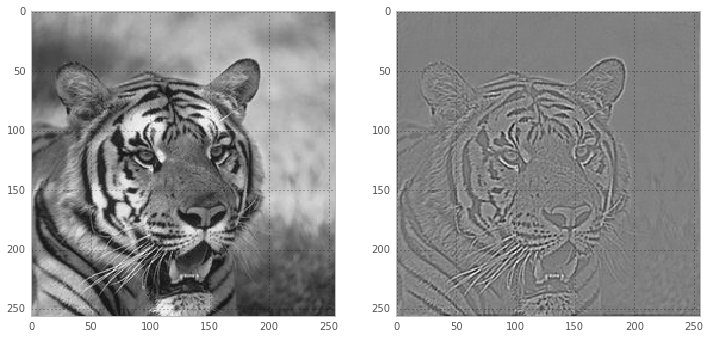

Using image  H_N16059.jpg


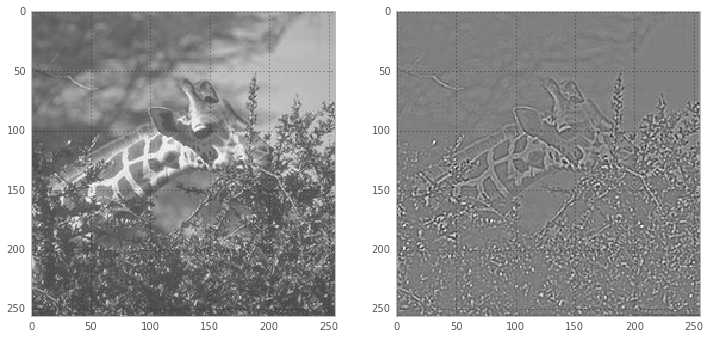

Using image  Mda_archi37.jpg


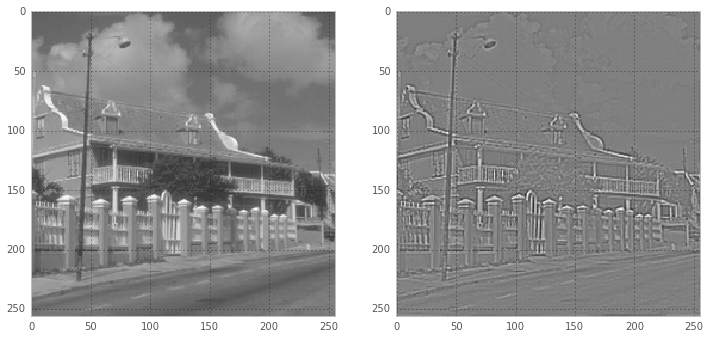

Using image  Bda_int16.jpg


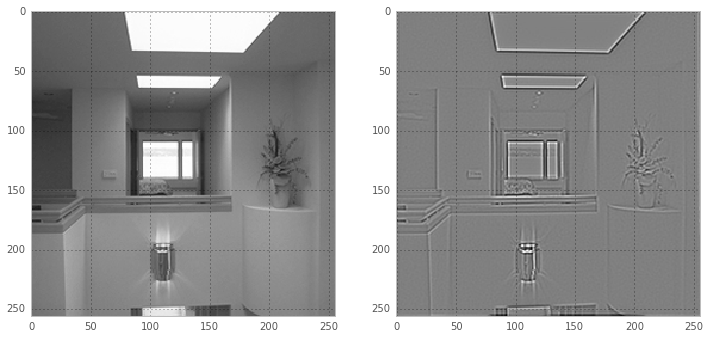

Using image  Mdn_land743.jpg


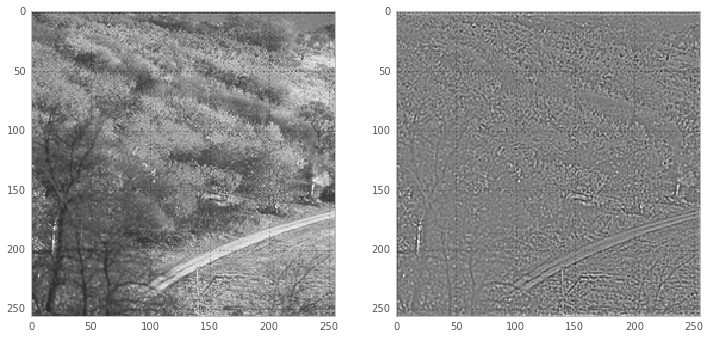

Using image  Bdn_text22.jpg


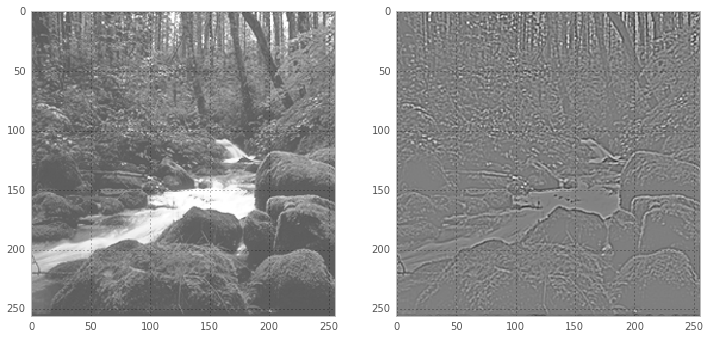

In [102]:
axs = []
im = Image('default_param.py')
im.pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
for name_database in ['serre07_targets', 'serre07_distractors']:
    for _ in range(4):
        fig = plt.figure(figsize=figsize)
        image, filename, croparea = im.patch(name_database, )
        axs.append(fig.add_subplot(1, 2, 1))
        axs[-1].imshow(im.normalize(image, center=True, use_max=True), **opts)
        axs.append(fig.add_subplot(1, 2, 2))
        axs[-1].imshow(im.normalize(im.whitening(image), center=True, use_max=True), **opts)
        plt.show()